In [157]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.preprocessing import PolynomialFeatures, PowerTransformer, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import r2_score

%matplotlib inline
get_ipython().run_line_magic('matplotlib', 'inline')

In [158]:
train = pd.read_csv('./datasets/trains_3.csv')

In [159]:
test = pd.read_csv('./datasets/test_3.csv')

In [160]:
test.shape

(879, 95)

In [161]:
train.head()

,Unnamed: 0,Id,PID,MS SubClass,MS Zoning,Lot Area,Street,Land Contour,Utilities,Lot Config,...,Lot Shape_Reg,Sale Type_COD,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_WD
0,0,109,533352170,60,RL,13517,Pave,Lvl,AllPub,CulDSac,...,0,0,0,0,0,0,0,0,0,1
1,1,544,531379050,60,RL,11492,Pave,Lvl,AllPub,CulDSac,...,0,0,0,0,0,0,0,0,0,1
2,2,153,535304180,20,RL,7922,Pave,Lvl,AllPub,Inside,...,1,0,0,0,0,0,0,0,0,1
3,3,318,916386060,60,RL,9802,Pave,Lvl,AllPub,Inside,...,1,0,0,0,0,0,0,0,0,1
4,4,255,906425045,50,RL,14235,Pave,Lvl,AllPub,Inside,...,0,0,0,0,0,0,0,0,0,1


In [162]:
target = np.log(train['SalePrice'])

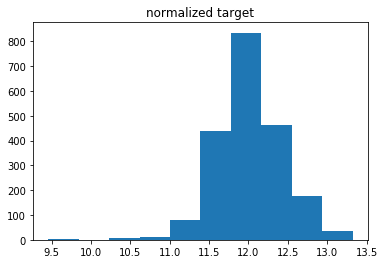

In [195]:
plt.hist(target)
plt.title('normalized target');

In [163]:
train.drop(columns='Unnamed: 0', inplace=True)
test.drop(columns='Unnamed: 0', inplace=True)

In [164]:
test.shape

(879, 94)

# Setting up a correlation matrix

I'm going to make a new dataframe with 10-15 variables and see what the correlation is between them. This will allow me to actually be able to see what variables have a relationship. 

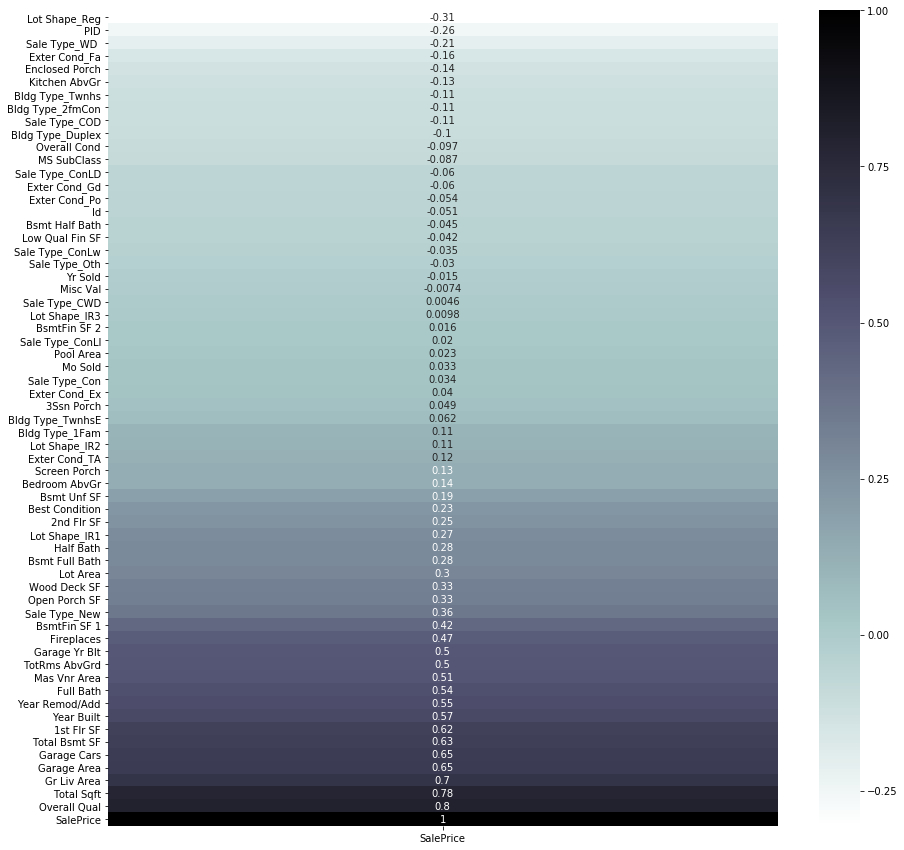

In [165]:
plt.figure(figsize = (15,15))
sns.heatmap(train.corr()[['SalePrice']].sort_values('SalePrice'), 
            annot = True, 
            cmap ='bone_r');

# Generating Features

From the heatmap above, I'm generating a feature list of 15 features that have the highest correlation with Sale Price. Excluding fireplaces, I have added everything that is 0.5 and greater to my feature list. 

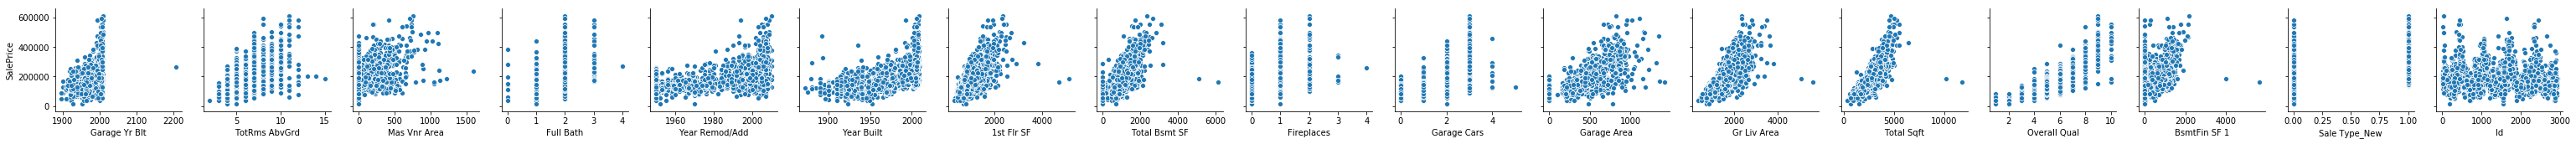

In [210]:
sns.pairplot(train, x_vars =['Garage Yr Blt', 'TotRms AbvGrd','Mas Vnr Area', 'Full Bath', "Year Remod/Add", 
            'Year Built', '1st Flr SF', 'Total Bsmt SF', 'Fireplaces',
            'Garage Cars', 'Garage Area', 'Gr Liv Area', 'Total Sqft', 'Overall Qual', 'BsmtFin SF 1',
            'Sale Type_New','Id'],
            y_vars = ['SalePrice']);

In [166]:
features = ['Garage Yr Blt', 'TotRms AbvGrd','Mas Vnr Area', 'Full Bath', "Year Remod/Add", 
            'Year Built', '1st Flr SF', 'Total Bsmt SF', 'Fireplaces',
            'Garage Cars', 'Garage Area', 'Gr Liv Area', 'Total Sqft', 'Overall Qual', 'BsmtFin SF 1',
            'Sale Type_New','Id']

X = train[features]
y= target

#Test data with features for feature engineering
X_kaggle = test[features]

print(X_kaggle.shape)

(879, 17)


In [167]:
test.shape

(879, 94)

# Baseline for our model

In [168]:
#Instantiate the model
lr = LinearRegression()

my R2 score, before scaling or anything else, is 79.1%

In [169]:
#This is my baseline score. 
cross_val_score(lr, X, y, cv = 5).mean()

0.8264079109937719

# Set train test split

In [170]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 40)

In [171]:
X_test.shape

(513, 17)

In [172]:
#Scale the data
ss = StandardScaler()
ss.fit(X_train)

/Users/maithilijoshi/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


StandardScaler(copy=True, with_mean=True, with_std=True)

In [173]:
#Fit and transform the data
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_kaggle)

/Users/maithilijoshi/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/maithilijoshi/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/Users/maithilijoshi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


# Cross Validation

In [174]:
lr = LinearRegression()
lasso = LassoCV(cv = 5)
ridge = RidgeCV(cv = 5)

In [175]:
#Linear Reg
cross_val_score(lr, X_train_scaled, y_train, cv = 5).mean()

0.8309598224477102

In [176]:
#Lasso
cross_val_score(lasso, X_train_scaled, y_train, cv = 5).mean()

0.829639874566003

In [177]:
#Ridge
cross_val_score(ridge, X_train_scaled, y_train, cv = 5).mean()

0.8316663010998676

# Evaluate our models

In [178]:
lasso.fit(X_train_scaled, y_train);

In [179]:
lasso.alpha_

0.0051009407197465766

In [180]:
#train score
lasso.score(X_train_scaled, y_train).mean()

0.8485307427959067

In [199]:
pred = lasso.predict(X_test_scaled)

In [200]:
preds = lasso.predict(X_test)

CV is 83.1% before fitting the train to my model

Train score is 84.9%



In [201]:
#Taking a look at my residuals and plotting them in a scatterplot
residuals = y_test - preds

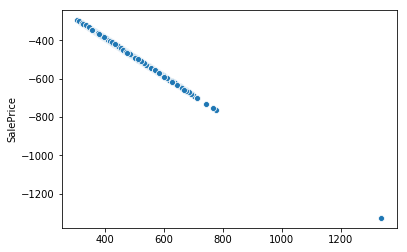

In [202]:
sns.scatterplot(preds, residuals)

# Model submission

In [182]:
X_test_scaled.shape

(879, 17)

In [183]:
X_test.shape

(513, 17)

In [184]:
submission6 = X_kaggle['Id']

In [185]:
submission6 = pd.DataFrame(submission6)

In [186]:
type(submission6)

pandas.core.frame.DataFrame

In [187]:
submission6['SalePrice'] = pred

In [188]:
submission6.set_index('Id', inplace=True)
submission6.head()

,SalePrice
Id,
2658,11.802950
2718,12.052882
2414,12.218212
1989,11.725652
625,12.063817


In [189]:
submission6.to_csv('./datasets/submission6.csv')